Scheduled Load based on Occupancy: [5, 5, 5, 5, 5, 5, 5, 5, 50, 50, 50, 50, 50, 20, 50, 20, 50, 5, 5, 5, 5, 5, 5, 5]
Percentage Cost Savings: 17.415936445544368
Percentage Energy Savings: 17.415936445544368


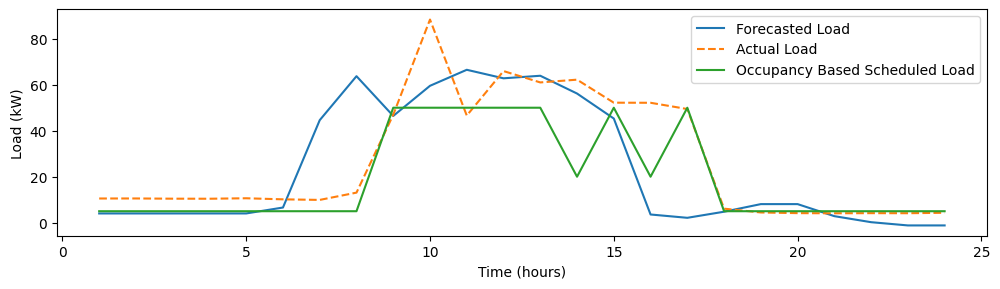

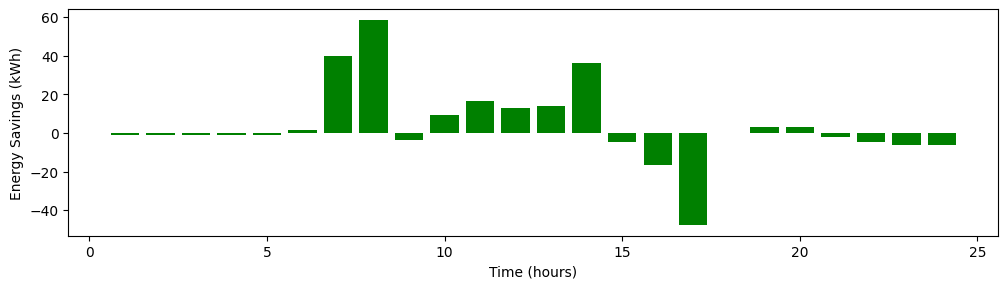

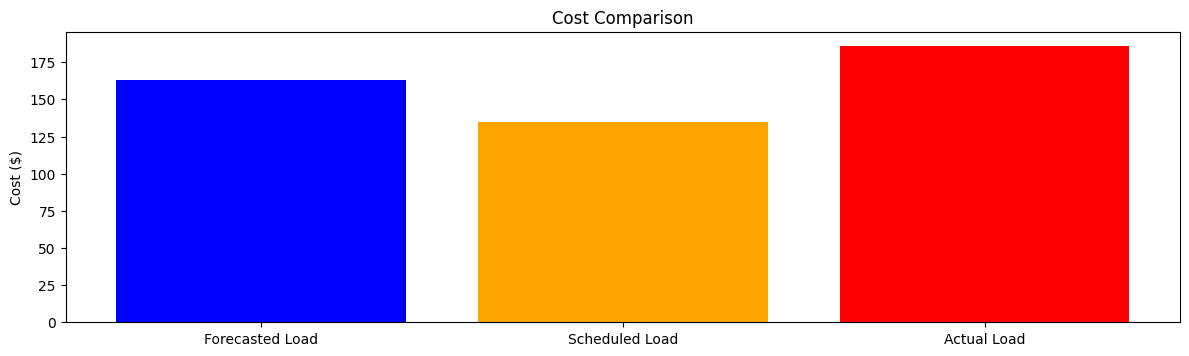

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
time_hours = list(range(1, 25))
forecasted_load = [4.029274761, 4.029343844, 4.028703679, 4.030159018, 4.030936197, 6.603889122, 44.59422322, 63.71282162, 46.42695157, 59.53102269, 66.49520143, 62.78931157, 63.90035595, 56.1693959, 45.29919473, 3.57544269, 2.132862115, 4.784206831, 8.088999211, 8.08883111, 2.851165809, 0.229267514, -1.179494202, -1.179436634]
occupancy = [0, 0, 0, 0, 0, 0, 0, 12, 51, 59, 220, 53, 251, 112, 340, 109, 86, 44, 31, 40, 46, 46, 27, 8]
actual_load = [10.53085616, 10.54476911, 10.44824568, 10.42646597, 10.63108375, 10.16490197, 9.916097139, 13.0829691, 46.95902364, 88.34063608, 46.60859693, 65.93362502, 60.99808791, 62.19939872, 52.18828273, 52.15155167, 49.43254787, 6.108531872, 4.45445186, 4.167114331, 4.103539475, 4.157906984, 4.132724773, 4.320910875]

# Load scheduling based on occupancy levels
low_load = 5  # kW
medium_load = 20  # kW
high_load = 50  # kW

scheduled_load = []

for i, hour in enumerate(time_hours):
    if occupancy[i] <= 50:
        load = low_load
    elif 100 < occupancy[i] <= 200:
        load = medium_load
    else:
        load = high_load

    scheduled_load.append(load)

# Calculate cost and energy savings
original_cost = sum(forecasted_load)
scheduled_cost = sum(scheduled_load)
percentage_cost_savings = ((original_cost - scheduled_cost) / original_cost) * 100
original_energy = sum(forecasted_load)
scheduled_energy = sum(scheduled_load)
percentage_energy_savings = ((original_energy - scheduled_energy) / original_energy) * 100

cost_per_unit_energy = 0.29  # adjust this value based on your specific cost
cost_forecasted_load = sum(forecasted_load) * cost_per_unit_energy
cost_scheduled_load = sum(scheduled_load) * cost_per_unit_energy
cost_actual_load = sum(actual_load) * cost_per_unit_energy
energy_savings = [original - scheduled for original, scheduled in zip(forecasted_load, scheduled_load)]


# Print results
print("Scheduled forecasted load:", scheduled_load)
print("Percentage Cost Savings:", percentage_cost_savings)
print("Percentage Energy Savings:", percentage_energy_savings)

plt.figure(figsize=(12, 10))
# Plot the results
plt.subplot(3, 1, 1)
plt.plot(time_hours, forecasted_load, label="Forecasted Load")
plt.plot(time_hours, actual_load, label="Actual Load",linestyle='--')
plt.plot(time_hours, scheduled_load, label="Occupancy Based Scheduled forecasted Load")
plt.xlabel("Time (hours)")
plt.ylabel("Load (kW)")
plt.legend()
plt.show()


plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
plt.bar(time_hours, energy_savings, color='green')
plt.xlabel('Time (hours)')
plt.ylabel('Energy Savings (kWh)')

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)
cost_comparison = [cost_forecasted_load, cost_scheduled_load, cost_actual_load]
labels = ['Forecasted Load', 'Scheduled Load', 'Actual Load']
plt.bar(labels, cost_comparison, color=['blue', 'orange', 'red'])
plt.ylabel('Cost ($)')
plt.title('Cost Comparison')

plt.tight_layout()
plt.show()

In [9]:
print(f'Total Energy Savings: {sum(energy_savings):.2f} kWh')
print(f'Percentage Energy Savings: {percentage_energy_savings:.2f}%')
print(f'Cost Savings: ${cost_forecasted_load - cost_scheduled_load:.2f}')
print(f'Percentage Cost Savings: {percentage_cost_savings:.2f}%')

Total Energy Savings: 98.06 kWh
Percentage Energy Savings: 17.42%
Cost Savings: $28.44
Percentage Cost Savings: 17.42%


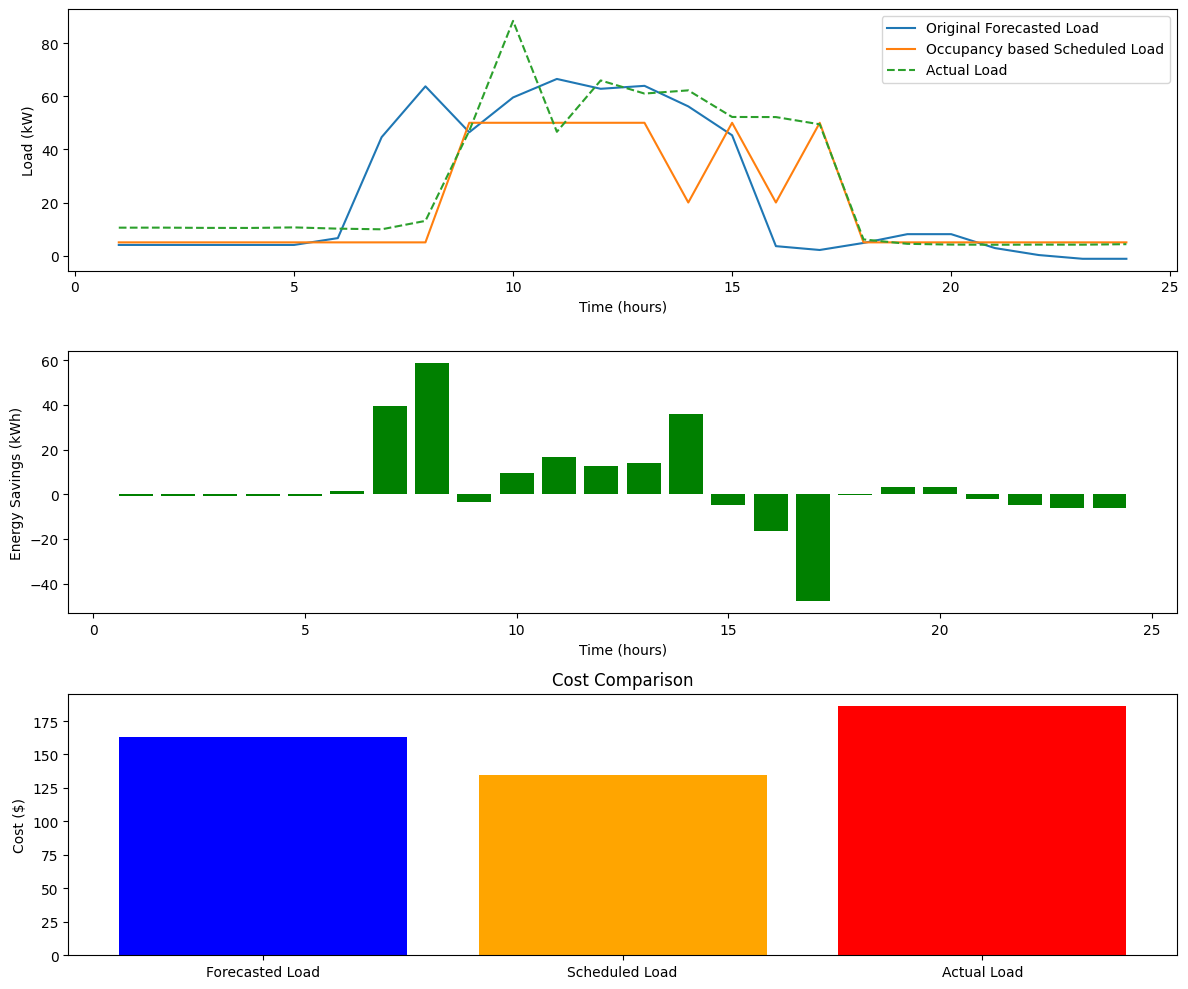

In [8]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(time_hours, forecasted_load, label='Original Forecasted Load')
plt.plot(time_hours, scheduled_load, label='Occupancy based Scheduled Load')
plt.plot(time_hours, actual_load, label='Actual Load',linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Load (kW)')
plt.legend()

plt.subplot(3, 1, 2)
plt.bar(time_hours, energy_savings, color='green')
plt.xlabel('Time (hours)')
plt.ylabel('Energy Savings (kWh)')

plt.subplot(3, 1, 3)
cost_comparison = [cost_forecasted_load, cost_scheduled_load, cost_actual_load]
labels = ['Forecasted Load', 'Scheduled Load', 'Actual Load']
plt.bar(labels, cost_comparison, color=['blue', 'orange', 'red'])
plt.ylabel('Cost ($)')
plt.title('Cost Comparison')

plt.tight_layout()
plt.show()